In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
RESULT_PATH = '../logs/log_notion_of_success_linear.json'

In [3]:
with open(RESULT_PATH, 'r') as f:
    results = json.load(f)
results

[{'entry_results': [{'faulted_coeffs': 264,
    'total_equations': 35328,
    'filtered_equations': 276,
    'duration': 0.35120201110839844,
    'failure': False,
    'equations_used': 264.0},
   {'faulted_coeffs': 256,
    'total_equations': 35328,
    'filtered_equations': 267,
    'duration': 0.28069591522216797,
    'failure': False,
    'equations_used': 256.0},
   {'faulted_coeffs': 286,
    'total_equations': 35328,
    'filtered_equations': 303,
    'duration': 0.29657578468322754,
    'failure': False,
    'equations_used': 286.0},
   {'faulted_coeffs': 286,
    'total_equations': 35328,
    'filtered_equations': 302,
    'duration': 0.24531221389770508,
    'failure': False,
    'equations_used': 286.0},
   {'faulted_coeffs': 289,
    'total_equations': 35328,
    'filtered_equations': 299,
    'duration': 0.349898099899292,
    'failure': False,
    'equations_used': 289.0}],
  'm': 1270,
  'num_signatures': 138,
  'nist_param_level': 3,
  'threshold': 196,
  'notion_of_suc

In [4]:
meta = [key for key in results[0].keys() if key != 'entry_results']
meta

['m',
 'num_signatures',
 'nist_param_level',
 'threshold',
 'notion_of_success',
 'timeout_limit']

In [5]:
df = pd.json_normalize(data=results, record_path='entry_results', meta=meta)
df = df.assign(false_positive_rate=lambda x: (x.filtered_equations - x.faulted_coeffs) / x.filtered_equations)
df

,faulted_coeffs,total_equations,filtered_equations,duration,failure,equations_used,failure_reason,m,num_signatures,nist_param_level,threshold,notion_of_success,timeout_limit,false_positive_rate
0,264,35328,276,0.351202,False,264.0,NaN,1270,138,3,196,256,60,0.043478
1,256,35328,267,0.280696,False,256.0,NaN,1270,138,3,196,256,60,0.041199
2,286,35328,303,0.296576,False,286.0,NaN,1270,138,3,196,256,60,0.056106
3,286,35328,302,0.245312,False,286.0,NaN,1270,138,3,196,256,60,0.052980
4,289,35328,299,0.349898,False,289.0,NaN,1270,138,3,196,256,60,0.033445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,406,519680,618,0.986866,False,406.0,NaN,1279,2030,3,196,383,60,0.343042
1441,413,519680,599,0.758644,False,413.0,NaN,1279,2030,3,196,383,60,0.310518
1442,416,519680,610,1.065920,False,416.0,NaN,1279,2030,3,196,383,60,0.318033
1443,383,519680,558,0.766120,False,383.0,NaN,1279,2030,3,196,383,60,0.313620


In [6]:
df_1279_and_success = df[(df['m'] == 1279) & (df['failure'] == False)][['faulted_coeffs', 'duration']]
df_1279_and_success

,faulted_coeffs,duration
255,362,43.429491
260,294,57.150428
265,306,48.335060
300,308,59.337791
301,272,54.448821
...,...,...
1440,406,0.986866
1441,413,0.758644
1442,416,1.065920
1443,383,0.766120


In [7]:
(
df_1279_and_success['faulted_coeffs'].min(),
df_1279_and_success['faulted_coeffs'].max(),
df_1279_and_success['faulted_coeffs'].max() - df_1279_and_success['faulted_coeffs'].min()
)

(272, 457, 185)

In [8]:
bins = np.arange(
    df_1279_and_success['faulted_coeffs'].min(),
    df_1279_and_success['faulted_coeffs'].max() + 1,
    5
)
bins

array([272, 277, 282, 287, 292, 297, 302, 307, 312, 317, 322, 327, 332,
       337, 342, 347, 352, 357, 362, 367, 372, 377, 382, 387, 392, 397,
       402, 407, 412, 417, 422, 427, 432, 437, 442, 447, 452, 457])

<AxesSubplot:xlabel='faulted_coeffs'>

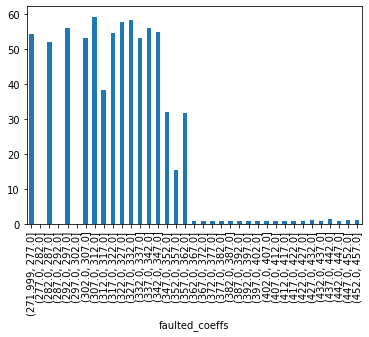

In [9]:
df_1279_and_success.groupby(
    pd.cut(x=df_1279_and_success['faulted_coeffs'],
           bins=bins,
           include_lowest=True
    )
).mean()['duration'].plot(kind='bar', legend=False)

In [10]:
df_1279_and_success['faulted_coeffs'].corr(df_1279_and_success['duration'])

-0.7477507641446777